In [54]:
import cv2
import matplotlib.pyplot as plt
from rembg import remove
import easygui as eg

In [55]:
def show_img(img):
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    

## Remove all image in output and output_remove_bgr

- We need to empty this 2 folders in order to refill them by img of the following image

In [56]:
import os, shutil

In [57]:
path_to_ouput = 'output/'
path_to_output_remove_bgr = 'output_remove_bgr/'

def del_file_in_folder(path):
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
            


In [133]:
del_file_in_folder(path_to_ouput)
del_file_in_folder(path_to_output_remove_bgr)


## Read image from img folder

In [147]:
path = 'img/img5.png'
img = cv2.imread(path)


In [182]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

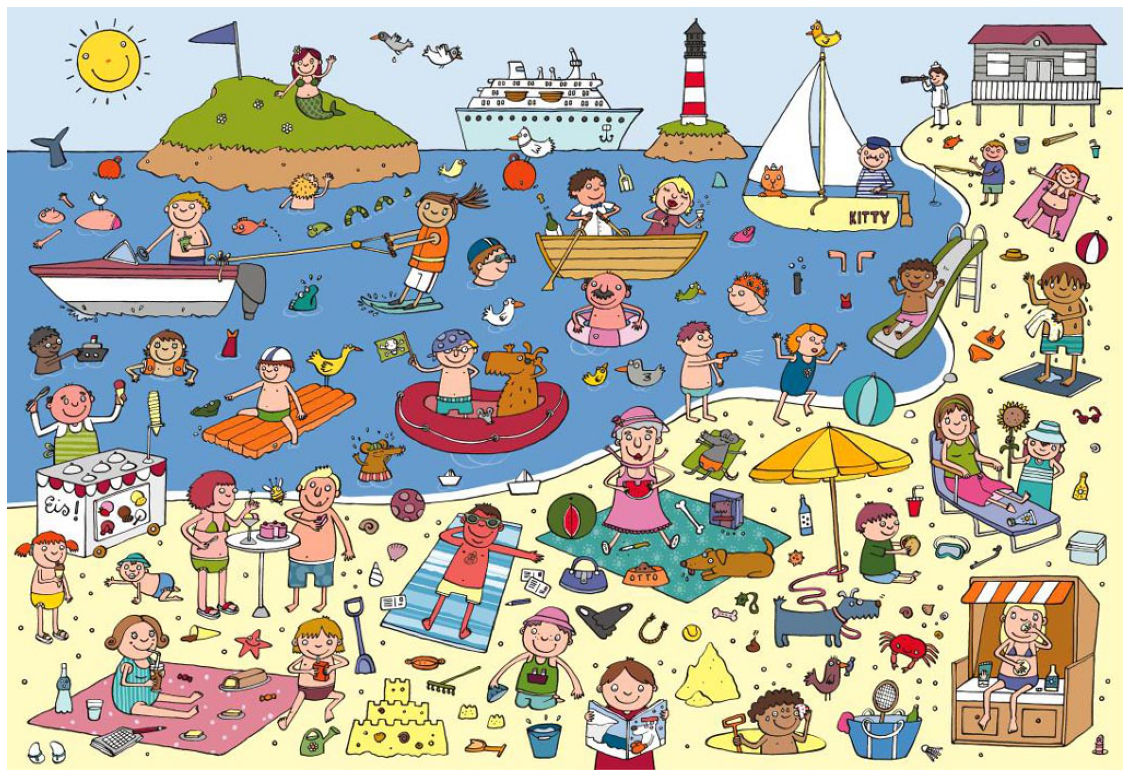

In [149]:
show_img(img_rgb)

## Recognition object from image by contour

### Edge detection

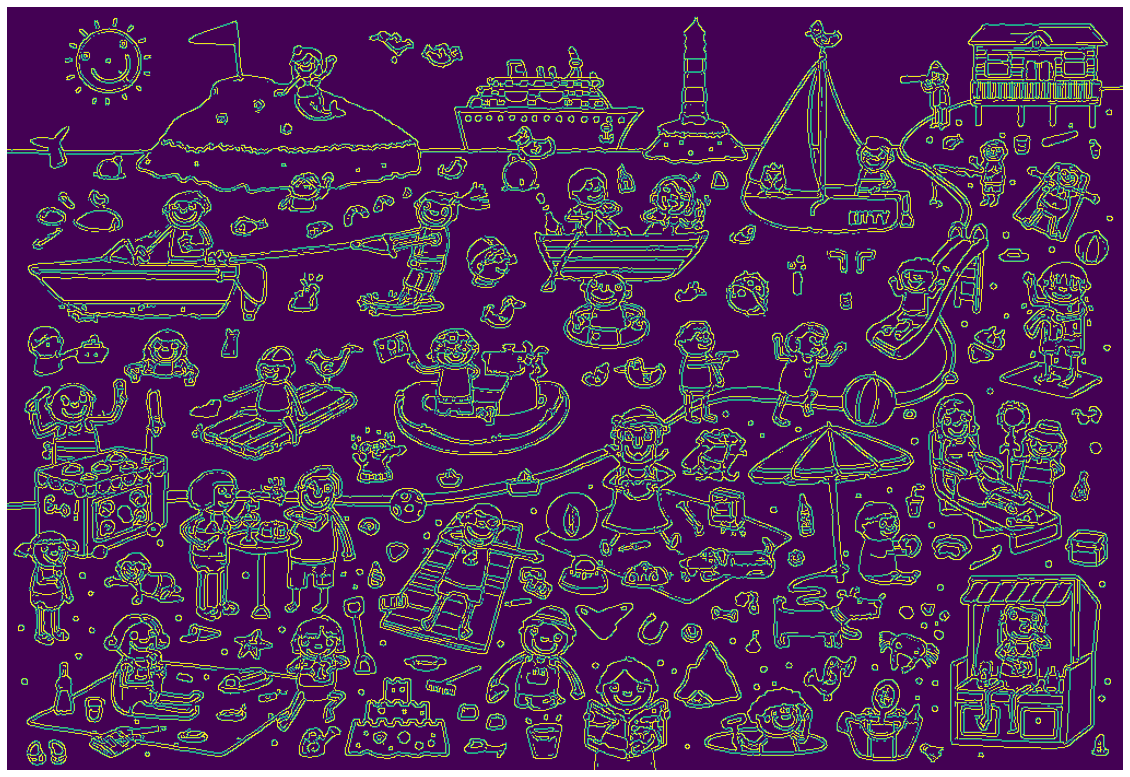

In [164]:
# img_rgb = 
img_unchanged = cv2.imread(path, cv2.IMREAD_UNCHANGED)
img_blur =  cv2.GaussianBlur(img_unchanged,(3,3),cv2.BORDER_ISOLATED)

edge = cv2.Canny(img_blur, 25, 255)
show_img(edge)

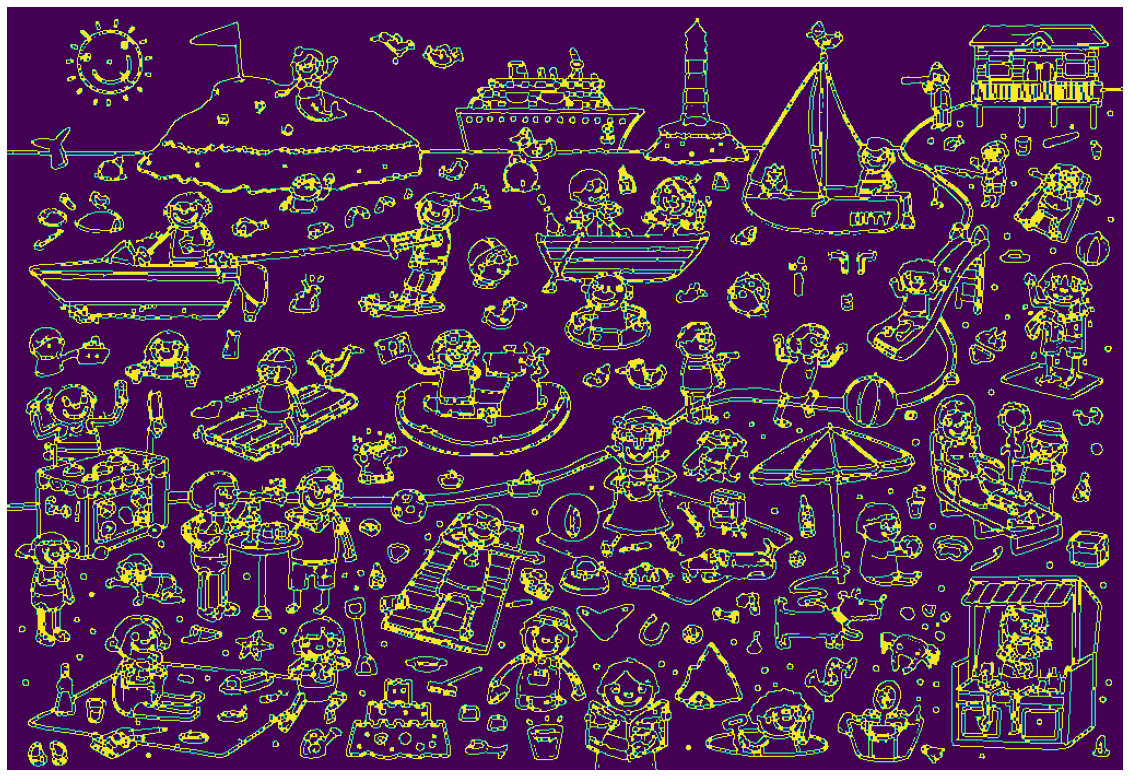

In [165]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
show_img(closed)

### Find contour and detect object

In [166]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

idx = 0
object_ls = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c) # position x, y and shape of a piece image store object
    
    if w>15 and w<120 and h>15 and h<120:
        new_img = img[y:y+h, x:x+w]
        object_ls.append(['output/'+str(idx)+'.png', x, y, w, h])
        cv2.imwrite('output/'+str(idx)+'.png', new_img)
        idx += 1



In [167]:
print(object_ls)

[['output/0.png', 836, 674, 22, 18], ['output/1.png', 19, 672, 18, 23], ['output/2.png', 39, 671, 17, 23], ['output/3.png', 419, 670, 39, 18], ['output/4.png', 993, 666, 16, 20], ['output/5.png', 268, 659, 39, 29], ['output/6.png', 476, 656, 33, 33], ['output/7.png', 439, 647, 19, 16], ['output/8.png', 413, 638, 20, 16], ['output/9.png', 639, 623, 113, 63], ['output/10.png', 760, 616, 79, 75], ['output/11.png', 310, 614, 96, 75], ['output/12.png', 384, 603, 51, 28], ['output/13.png', 729, 595, 49, 41], ['output/14.png', 528, 595, 80, 103], ['output/15.png', 611, 581, 62, 62], ['output/16.png', 799, 572, 55, 39], ['output/17.png', 209, 570, 35, 28], ['output/18.png', 618, 565, 19, 18], ['output/19.png', 159, 565, 38, 18], ['output/20.png', 578, 555, 28, 30], ['output/21.png', 439, 548, 91, 97], ['output/22.png', 521, 546, 53, 34], ['output/23.png', 308, 540, 31, 72], ['output/24.png', 667, 535, 22, 22], ['output/25.png', 469, 513, 31, 30], ['output/26.png', 331, 508, 16, 25], ['output/2

## Change color

In [168]:
import numpy as np
import random

### Entire image

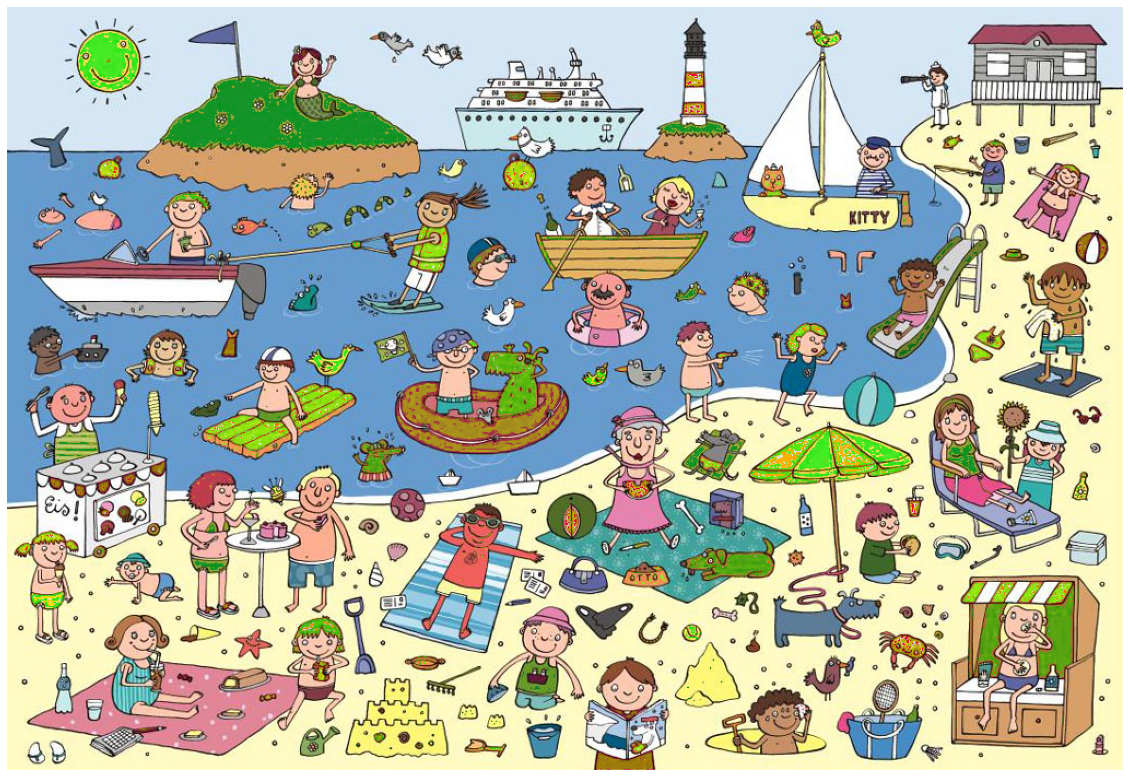

In [169]:

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

lower = np.array([80, 190, 120])
upper = np.array([150, 250, 255])

mask = cv2.inRange(img_hsv, lower, upper)
inv_mask = cv2.bitwise_not(mask)

h, s, v = cv2.split(img_hsv)

h = np.mod(h + 100, 130)
s = np.clip(s +10 , 20, 255)
v = np.clip(v -20 , 20, 255)

img_hsv = cv2.merge([h, s, v])

bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

result = cv2.bitwise_or(cv2.bitwise_and(img_rgb, img_rgb, mask = inv_mask), cv2.bitwise_and(bgr, bgr, mask = mask))

show_img(result)


### some piece of images

In [170]:
def change_object_color(index, obj_img =object_ls ):
    dir = obj_img[index][0]
    
    img = cv2.imread(dir)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    #! range of color want to change
    lower = np.array([50, 190, 120])
    upper = np.array([170, 250, 255])

    mask = cv2.inRange(img_hsv, lower, upper)
    inv_mask = cv2.bitwise_not(mask)

    #! adjust the range of color in piece which cropped from original image
    h, s, v = cv2.split(img_hsv)

    h = np.mod(h + 120, 150)
    s = np.clip(s +30 , 10, 255)
    v = np.clip(v -20 , 10, 255)
    img_hsv = cv2.merge([h, s, v])

    bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

    result = cv2.bitwise_or(cv2.bitwise_and(img_rgb, img_rgb, mask = inv_mask), cv2.bitwise_and(bgr, bgr, mask = mask))
    
    #* remove background from image ( do it twice so it will have better result)
    #! do more than twice the object in  image will be vanished  
    result = remove(result)
    result = remove(result)

    #* save it
    cv2.imwrite('output_remove_bgr/'+str(index)+'_.png',result)
    


In [171]:
ori_img = cv2.imread(path, cv2.IMREAD_UNCHANGED)


In [172]:
def paste_to_img(index, ori_img = ori_img, obj_img = object_ls):
    
    height, width = ori_img.shape[:2]
    bg_bgr = ori_img[:,:,0:3]
    bg_mask = ori_img[:,:,2]
    
    
    for i in index:
        change_object_color(i)
    
        x = obj_img[i][1]
        y = obj_img[i][2]
        w = obj_img[i][3]
        h = obj_img[i][4]
        
        
        img_ = cv2.imread('output_remove_bgr/'+str(i)+ '_.png', cv2.IMREAD_UNCHANGED)
    
    
        bgr = img_[:,:,0:3]
        mask = img_[:, :, 3]
        
        bgr_new = bg_bgr.copy()
        bgr_new[y:y+h, x:x+w] = bgr
        
        mask_new = np.zeros((height, width), dtype = np.uint8)
        mask_new[y:y+h, x:x+w] = mask
        
        mask_combined = cv2.multiply(bg_mask, mask_new)
        mask_combined = cv2.cvtColor(mask_combined, cv2.COLOR_GRAY2BGR)
        
        result = np.where(mask_combined==255, bgr_new, bg_bgr)
        ori_img = result
        bg_bgr = ori_img[:,:,0:3]
    cv2.imwrite('result.png', result)

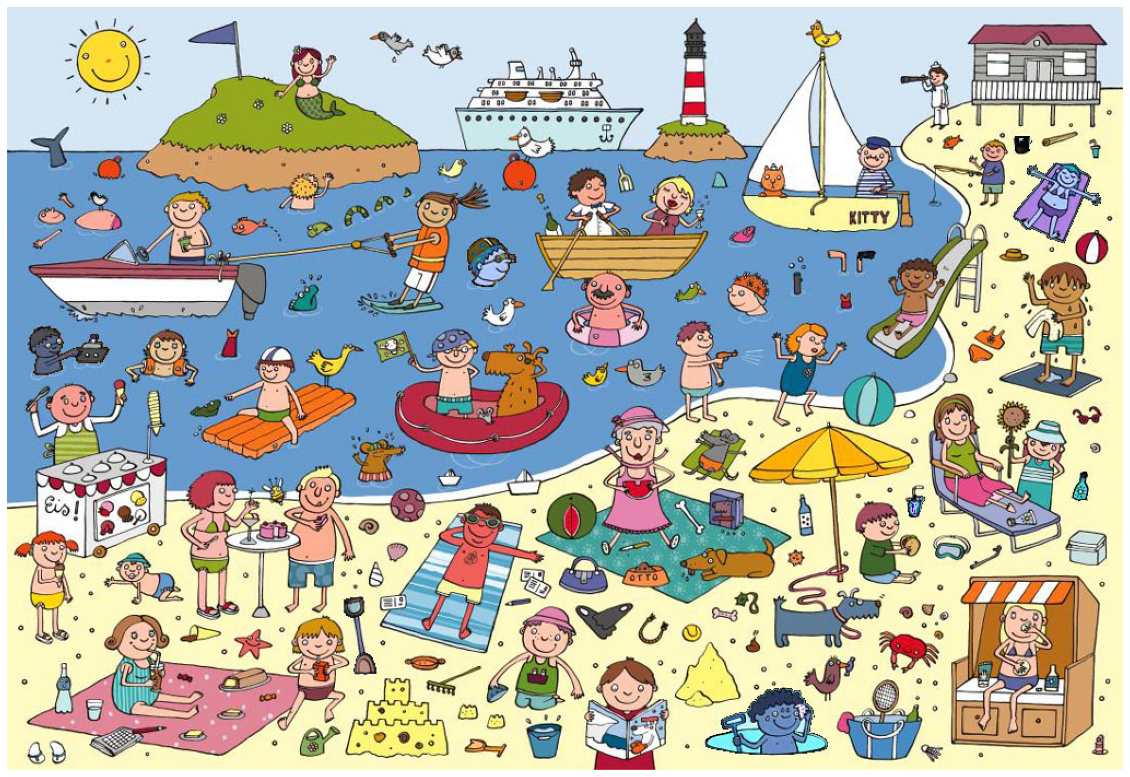

In [173]:
#* make it random or you can manually choose which image have entire object to change ( increase the difficulty of the game)
obj_len = len(object_ls)
color_changed_object_idx = random.sample(range(0, obj_len), 10 if obj_len >= 10 else obj_len)

paste_to_img(color_changed_object_idx)
img_result = cv2.imread('result.png')
img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
show_img(img_result)

## flip image


In [179]:
def flip_image_and_paste(index, ori_img = img.copy(), obj_img = object_ls, path = 'output/'):
    
    for i in index:
    
        img_ = cv2.imread(path+str(i)+'.png')
        img_vh = cv2.flip(img_, -1)
        
        # get the position of each img which are taken out from ori_img
        x = obj_img[i][1]
        y = obj_img[i][2]
        w = obj_img[i][3]
        h = obj_img[i][4]
        
        ori_img[y:y+h, x:x+w] = img_vh
    
    cv2.imwrite('result2.png', ori_img)
    

In [180]:
orient_changed_object_idx = random.sample(range(0, obj_len), 10 if obj_len >= 10 else obj_len)

In [181]:
flip_image_and_paste(orient_changed_object_idx)